In [1]:
Final ARIMA with forecasting results.
Transformation and scaling also performed
Model evaluated using RMSE,MSE,MAPE 


In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pylab as plt
%matplotlib inline

In [2]:
dataset = pd.read_excel("RBRTE Data.xlsx")

In [3]:
dataset

,Date,Price
0,1987-05-20,18.63
1,1987-05-21,18.45
2,1987-05-22,18.55
3,1987-05-25,18.60
4,1987-05-26,18.63
...,...,...
8906,2022-06-21,118.51
8907,2022-06-22,115.54
8908,2022-06-23,114.50
8909,2022-06-24,117.36


In [4]:
dataset['Date'] = pd.to_datetime(dataset['Date'],infer_datetime_format=True) 
df = dataset.set_index(['Date'])

# printing
df.head(5)

,Price
Date,
1987-05-20,18.63
1987-05-21,18.45
1987-05-22,18.55
1987-05-25,18.60
1987-05-26,18.63


In [5]:
# checking for null values
df.isnull().sum()

Price    0
dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

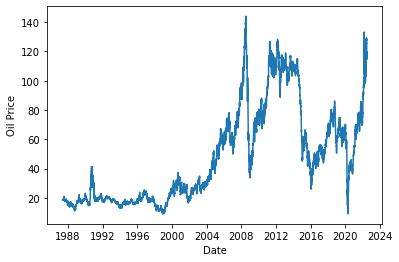

In [6]:
# labeling
plt.xlabel('Date')
plt.ylabel('Oil Price')

# plotting
plt.plot(df)
plt.show

# Check if the time series is stationary

In [7]:
#Determine rolling statistics
rolmean = df.rolling(window=12).mean() 
rolstd = df.rolling(window=12).std()

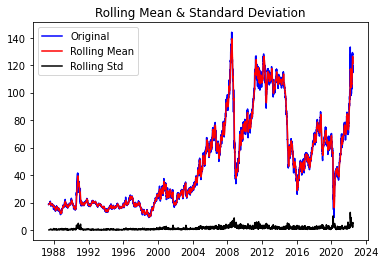

In [8]:
#Plot rolling statistics
orig = plt.plot(df, color='blue', label='Original')
mean = plt.plot(rolmean, color='red', label='Rolling Mean')
std = plt.plot(rolstd, color='black', label='Rolling Std')

# labeling
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show()

In [ ]:
Data transformation to make time-series data stationary. 

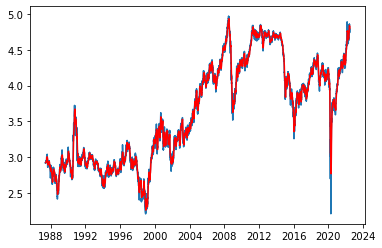

In [9]:
# importing the module
import numpy as np


#Estimating trend
logScale = np.log(df)

#The below transformation is required to make series stationary
movingAverage = logScale.rolling(window=12).mean()
movingSTD = logScale.rolling(window=12).std()

# plotting the graph
plt.plot(logScale)
plt.plot(movingAverage, color='red')
plt.show()

In [10]:
# Trasformed dataset
log_transformed = logScale - movingAverage
log_transformed.head(12)

#Remove NAN values
log_transformed.dropna(inplace=True)

# printing heading of dataset
log_transformed.head()

,Price
Date,
1987-06-04,0.008298
1987-06-05,0.001262
1987-06-08,0.005265
1987-06-09,0.005837
1987-06-10,0.005035


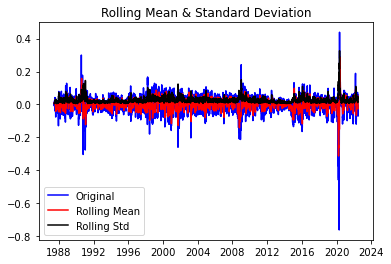

In [11]:
#Determine rolling statistics
movingAverage = log_transformed.rolling(window=12).mean()
movingSTD = log_transformed.rolling(window=12).std()
    
#Plot rolling statistics for the transformed dataset
orig = plt.plot(log_transformed, color='blue', label='Original')
mean = plt.plot(movingAverage, color='red', label='Rolling Mean')
std = plt.plot(movingSTD, color='black', label='Rolling Std')

# plotting stationary time series data
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show()

# Timeshift transformation

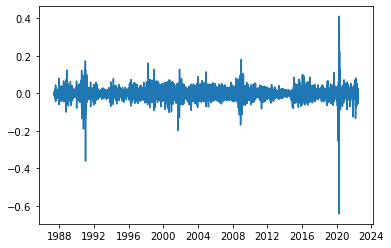

In [12]:
# transforming the dataset
Shifting = logScale - logScale.shift()

# plotting 
plt.plot(Shifting)
plt.show()

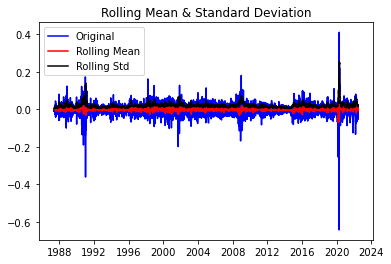

In [13]:
#Determine rolling statistics
movingAverage = Shifting.rolling(window=12).mean()
movingSTD = Shifting.rolling(window=12).std()
    
#Plot rolling statistics for the transformed dataset
orig = plt.plot(Shifting, color='blue', label='Original')
mean = plt.plot(movingAverage, color='red', label='Rolling Mean')
std = plt.plot(movingSTD, color='black', label='Rolling Std')

# Labeling
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show()

# Building ARIMA Model

C:\Users\Anuja\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
C:\Users\Anuja\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
    

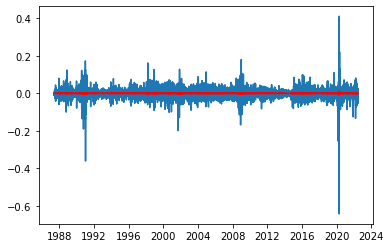

In [14]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(logScale, order=(1,1,1))

# fiting the model
results_ARIMA = model.fit()

# plotting the results
plt.plot(Shifting)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.show()

In [15]:
print(results_ARIMA.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Price   No. Observations:                 8910
Model:                 ARIMA(1, 1, 1)   Log Likelihood               20043.359
Method:                       css-mle   S.D. of innovations              0.026
Date:                Tue, 16 Aug 2022   AIC                         -40078.717
Time:                        13:36:39   BIC                         -40050.338
Sample:                             1   HQIC                        -40069.056
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0002      0.000      0.765      0.444      -0.000       0.001
ar.L1.D.Price    -0.5726      0.346     -1.654      0.098      -1.251       0.106
ma.L1.D.Price     0.5881      0.342     

# Predictions and reverse transformation

In [16]:
# making predictions
predictions_ARIMA = pd.Series(results_ARIMA.fittedvalues, copy=True)

#Convert to cumulative sum
predictions_ARIMA_cumsum = predictions_ARIMA.cumsum()

# reversing the transformation to original data
predictions_ARIMA_log = pd.Series(logScale['Price'].iloc[0], index=logScale.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_cumsum, fill_value=0)

# printing heading 
predictions_ARIMA_log.head()

Date
1987-05-20    2.924773
1987-05-21    2.924982
1987-05-22    2.925039
1987-05-25    2.925417
1987-05-26    2.925565
dtype: float64

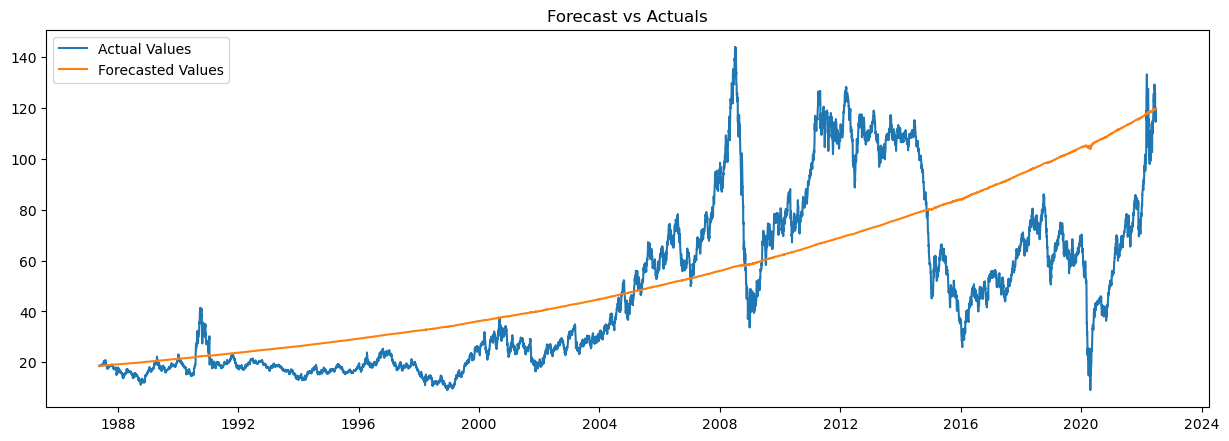

In [17]:
# Inverse of log is exp 
predictions_ARIMA = np.exp(predictions_ARIMA_log)
# Plot
plt.figure(figsize=(15,5), dpi=100)
# plotting actual values
plt.plot(df,label='Actual Values')
plt.plot(predictions_ARIMA,label='Forecasted Values')
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=10)
plt.show()

In [18]:
predictions_ARIMA

Date
1987-05-20     18.630000
1987-05-21     18.633890
1987-05-22     18.634953
1987-05-25     18.642001
1987-05-26     18.644753
                 ...    
2022-06-21    119.583063
2022-06-22    119.582630
2022-06-23    119.575091
2022-06-24    119.602020
2022-06-27    119.671210
Length: 8911, dtype: float64

C:\Users\Anuja\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
C:\Users\Anuja\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
C:\Users\Anuja\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


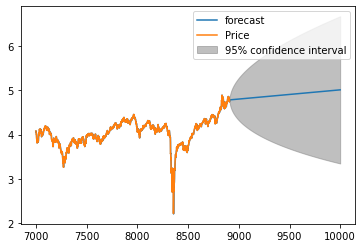

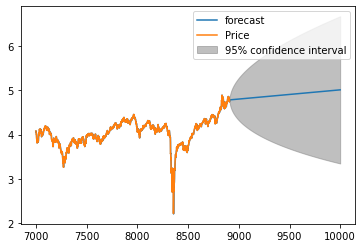

In [19]:
# predict future points ( for upcomung years)
results_ARIMA.plot_predict(7000, 10000) 

In [20]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rms = sqrt(mean_squared_error(df, predictions_ARIMA))
print(rms)

26.192364676339874
